# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn import preprocessing
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Read the dataset 

In [2]:
# fields are separated by comma and skip the first row (titles) when reading
data = np.loadtxt("hw03_data.txt", skiprows=1, dtype = "float", delimiter=",")

# Scale the data with sklearn StandardScaler
# Write your code here
scaler = preprocessing.StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

X = data[:, [0]]
y = data[:, [1]]

# Visualize the dataset

Saving figure generated_data_plot


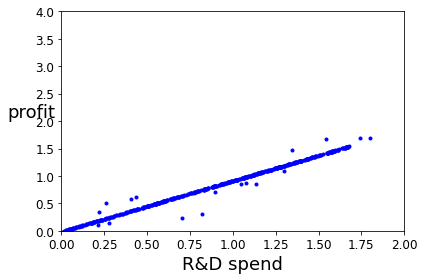

In [3]:
# Write your code here
plt.plot(X, y, "b.")
plt.xlabel("R&D spend", fontsize=18)
plt.ylabel("profit", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 4])
save_fig("generated_data_plot")
plt.show()

# Training with scikit_learn Linear Regression 



In [4]:
# Write your code here
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [5]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [6]:
# Calculating the Intercept and the Coefficient
lin_reg.intercept_, lin_reg.coef_

(array([-0.00115483]), array([[0.94421415]]))

# Prediction
Now we can make predictions using the weights.

In [7]:
# Write your code here
# Predicting the Test set results
y_pred = lin_reg.predict(X_test)
y_pred

array([[ 0.12876307],
       [-0.18041772],
       [-0.65296841],
       [ 0.19000648],
       [ 1.00174053],
       [-0.65128355],
       [ 0.83644218],
       [ 0.469002  ],
       [-0.74127097],
       [-0.65846955],
       [ 1.15341795],
       [ 1.0427454 ],
       [-0.33329281],
       [-0.26484309],
       [-0.64695977],
       [ 0.95990338],
       [-0.0612397 ],
       [-0.34908577],
       [ 0.02639299],
       [-0.32543693],
       [-1.03139059],
       [ 0.15257431],
       [-1.27526807],
       [-1.16088072],
       [ 1.20735357],
       [ 1.07006845],
       [ 1.39287016],
       [ 0.37917697],
       [ 0.07285841],
       [ 1.02015212],
       [ 0.61542187],
       [-0.14178788],
       [ 1.09942144],
       [ 0.52805307],
       [-1.27471998],
       [-0.71764243],
       [-0.87979436],
       [-1.06447867],
       [-0.06154419],
       [ 1.20510033],
       [-1.38963512],
       [-0.71618087],
       [ 0.05440621],
       [ 0.53448799],
       [ 1.1663081 ],
       [ 0

# Evaluation
Best possible $R^{2}$ score  is 1.0. <br>

In [8]:
# Calculating the R squared value
# Write your code here
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9134554891584079

In [9]:
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Linear regression using gradient descent
Solve the same problem with gradient descent algorithm

In [10]:
# Write your code here
alpha = 0.2  # learning rate
n_iterations = 800
m = 800

weight = np.random.randn(2,1)  # random initialization

X_b = np.c_[np.ones((800, 1)), X_train]  # add x0 = 1 to each instance

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(weight) - y_train)
    weight = weight - alpha * gradients


# weight values

In [11]:
# Write your code here
print(weight)


[[-0.00115483]
 [ 0.94421415]]


# predictions

In [12]:
y_pred= weight[[1],:] * X_test + weight[[0],:]
print(y_pred)

[[ 0.12876307]
 [-0.18041772]
 [-0.65296841]
 [ 0.19000648]
 [ 1.00174053]
 [-0.65128355]
 [ 0.83644218]
 [ 0.469002  ]
 [-0.74127097]
 [-0.65846955]
 [ 1.15341795]
 [ 1.0427454 ]
 [-0.33329281]
 [-0.26484309]
 [-0.64695977]
 [ 0.95990338]
 [-0.0612397 ]
 [-0.34908577]
 [ 0.02639299]
 [-0.32543693]
 [-1.03139059]
 [ 0.15257431]
 [-1.27526807]
 [-1.16088072]
 [ 1.20735357]
 [ 1.07006845]
 [ 1.39287016]
 [ 0.37917697]
 [ 0.07285841]
 [ 1.02015212]
 [ 0.61542187]
 [-0.14178788]
 [ 1.09942144]
 [ 0.52805307]
 [-1.27471998]
 [-0.71764243]
 [-0.87979436]
 [-1.06447867]
 [-0.06154419]
 [ 1.20510033]
 [-1.38963512]
 [-0.71618087]
 [ 0.05440621]
 [ 0.53448799]
 [ 1.1663081 ]
 [ 0.66710424]
 [ 0.78510489]
 [ 0.45556377]
 [ 0.5305905 ]
 [-1.05802345]
 [-0.1157031 ]
 [-1.33823694]
 [ 1.23640207]
 [ 1.36615609]
 [-0.28811579]
 [-0.40053511]
 [ 1.44167001]
 [ 0.40979015]
 [ 0.06274928]
 [-1.21463364]
 [-0.0139014 ]
 [-0.69021788]
 [ 1.49927983]
 [-1.36527579]
 [ 1.41863015]
 [-0.46509708]
 [-1.27352

# Evalutions

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9134554891584079

# Question 7

a) The R Squared value for this model is 0.9134554891584079 which is good but not pretty good.regression model fits the data well if the differences between the observations and the predicted values are small and unbiased. Unbiased in this context means that the fitted values are not systematically too high or too low anywhere in the observation space.


b)I feel we can increase the R Squared value  by providing the more number of independent variables.

c) i have improved the r squared value to 0.9989507784875615 by providing 95% train data.

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [118]:
# Write your code here
alpha = 0.2 # learning rate
n_iterations = 1000
m =1000

weight = np.random.randn(2,1)  # random initialization

X_b = np.c_[np.ones((950, 1)), X_train]  # add x0 = 1 to each instance

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(weight) - y_train)
    weight = weight - alpha * gradients


In [119]:
print(weight)

[[0.00098084]
 [0.94598857]]


In [120]:
y_pred= weight[[1],:] * X_test + weight[[0],:]

In [121]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9989507784875615